<a href="https://colab.research.google.com/github/santdayalverma/sa/blob/main/Super_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np   #linear algebra equation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = '/content/drive/MyDrive/Kaggle_Datasets/supermarket_sales - Sheet1.csv'
df = pd.read_csv(data)

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

By inspection, the 'Date' datatype is an object, we need to change it to datetime



Data Clearning

In [ ]:
date_format = pd.to_datetime(df['Date'])
print(date_format.head())

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]


In [ ]:
date_format.dtype

dtype('<M8[ns]')

In [ ]:
type(date_format)

pandas.core.series.Series

In [ ]:
day_format = date_format.dt.day
month_format = date_format.dt.month
year_format = date_format.dt.year

In [ ]:
print(day_format.head())
print(month_format.head())
print(year_format.head())

0     5
1     8
2     3
3    27
4     8
Name: Date, dtype: int64
0    1
1    3
2    3
3    1
4    2
Name: Date, dtype: int64
0    2019
1    2019
2    2019
3    2019
4    2019
Name: Date, dtype: int64


In [ ]:
time_format = pd.to_datetime(df['Time'])
print(time_format.head())

0   2021-05-15 13:08:00
1   2021-05-15 10:29:00
2   2021-05-15 13:23:00
3   2021-05-15 20:33:00
4   2021-05-15 10:37:00
Name: Time, dtype: datetime64[ns]


In [ ]:
type(time_format)

pandas.core.series.Series

In [ ]:
hour_format = time_format.dt.hour
print(hour_format.head())

0    13
1    10
2    13
3    20
4    10
Name: Time, dtype: int64


Let's see the unique hours of sales in this dataset

In [ ]:
day_format.unique()

array([ 5,  8,  3, 27, 25, 24, 10, 20,  6,  9, 12,  7, 29, 15, 11,  1, 21,
       17,  2, 22, 28, 23,  4, 16, 19, 14, 13, 26, 18, 30, 31])

In [ ]:
day_format.nunique()

31

In [ ]:
df.set_index('Date',inplace =True)

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
1/5/2019,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3/8/2019,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
3/3/2019,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
1/27/2019,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2/8/2019,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
df.isnull().sum() # To check null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df.isnull() # To check null values

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
1/5/2019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3/8/2019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3/3/2019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1/27/2019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2/8/2019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/29/2019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3/2/2019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2/9/2019,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Lets's first handle Unit Price column by using mean value

In [ ]:
avg_unit_price = df["Unit price"].astype("float").mean(axis=0)
df["Unit price"].replace(np.nan, avg_unit_price, inplace=True)
print(avg_unit_price)

55.67212999999998


In [ ]:
x  = df["Unit price"].replace(np.nan, avg_unit_price, inplace=False)
print(x)

Date
1/5/2019     74.69
3/8/2019     15.28
3/3/2019     46.33
1/27/2019    58.22
2/8/2019     86.31
             ...  
1/29/2019    40.35
3/2/2019     97.38
2/9/2019     31.84
2/22/2019    65.82
2/18/2019    88.34
Name: Unit price, Length: 1000, dtype: float64


In [ ]:
x  = df["Unit price"].replace(np.nan, avg_unit_price, inplace=True)
print(x)

None


In [ ]:
avg_unit_income = df["gross income"].astype("float").mean(axis=0)
print(avg_unit_income)

15.379369000000002


For Quantity we will use Mode value

In [ ]:
from scipy import stats
mode=stats.mode(df['Quantity'])

print(mode)

ModeResult(mode=array([10]), count=array([119]))


In [ ]:
y=df['Quantity'].replace(np.nan, "mode", inplace=True)
print(y)               # It's gives None value

None


For rest remaining values we will simply drop them

In [ ]:
z = df.dropna(inplace=True)
print(z)

None


In [ ]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000e+00,1.077756e-02,6.339621e-01,6.339621e-01,6.339621e-01,-6.998957e-16,6.339621e-01,-8.777507e-03
Quantity,1.077756e-02,1.000000e+00,7.055102e-01,7.055102e-01,7.055102e-01,-3.849075e-16,7.055102e-01,-1.581490e-02
Tax 5%,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Total,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02
cogs,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02
gross margin percentage,-6.998957e-16,-3.849075e-16,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15
gross income,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Rating,-8.777507e-03,-1.581490e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00


In [ ]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-0.0,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00


In [ ]:
categorical_columns = [cname for cname in df.columns if df[cname].dtype == "object"]
print(categorical_columns)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Time', 'Payment']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1/5/2019 to 2/18/2019
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income     

Let's find the number of unique values in columns with object datatype

In [ ]:
categorical_columns = [cname for cname in df.columns if df[cname].dtype == "float64"]
print(categorical_columns)

['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [ ]:
print("# unique values in Branch: {0}".format(len(df['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(df['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(df['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(df['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(df['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(df['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


Data Visualization

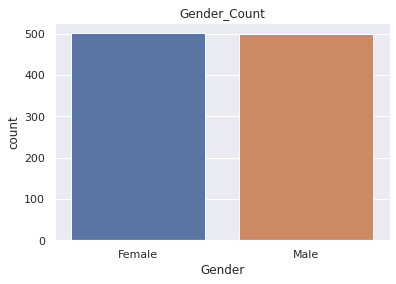

In [ ]:
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =df).set_title("Gender_Count")

Text(0.5, 1.0, 'Gender_Count')

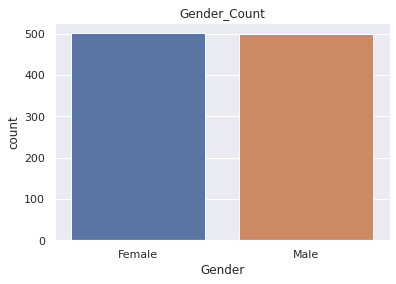

In [ ]:
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =df)
plt.title("Gender_Count")

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
1/5/2019,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3/8/2019,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
3/3/2019,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
1/27/2019,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2/8/2019,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Text(0.5, 1.0, 'Ratings by Branch')

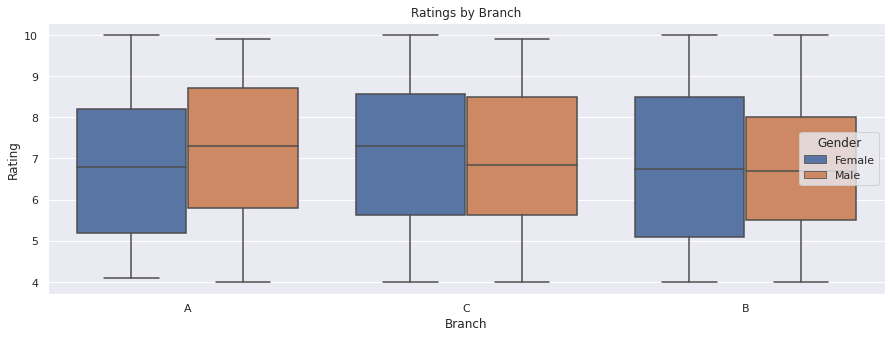

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="Branch", y = "Rating" ,data =df, hue = 'Gender')
plt.title("Ratings by Branch")


Branch B has the lowest rating among all the branches

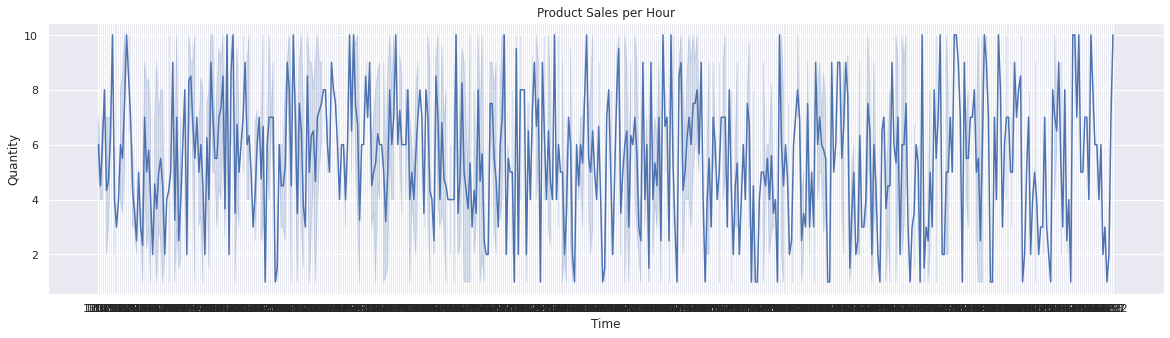

In [ ]:
plt.figure(figsize=(20, 5))
genderCount  = sns.lineplot(x="Time",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

In [ ]:
df['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

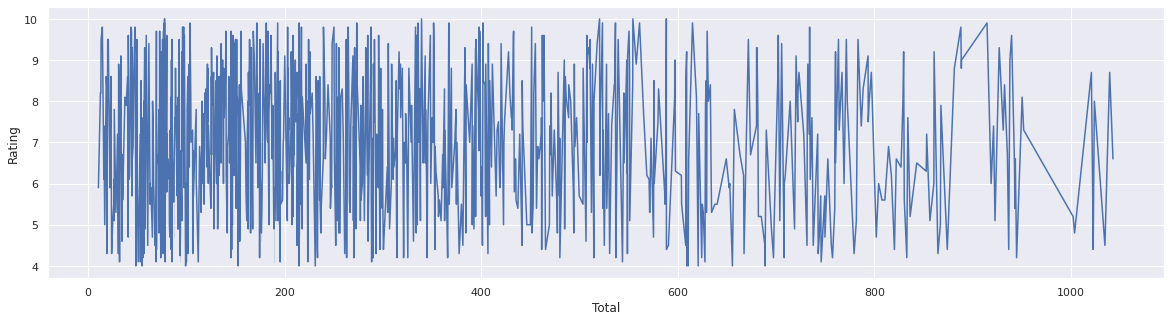

In [ ]:
plt.figure(figsize=(20, 5))
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =df)

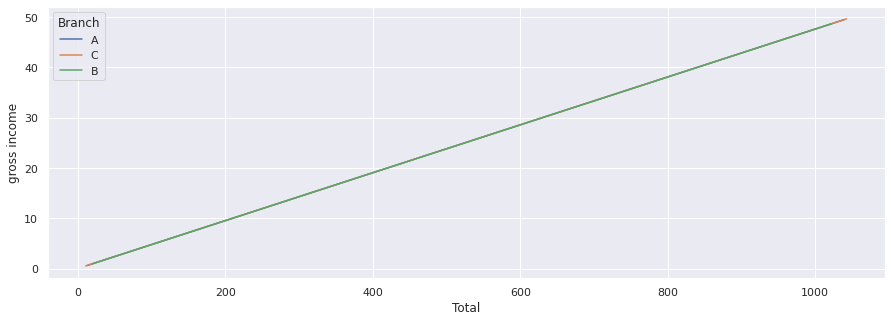

In [ ]:
plt.figure(figsize=(15, 5))
ageDisSpend = sns.lineplot(x="Total", y = "gross income", hue = 'Branch', data =df)

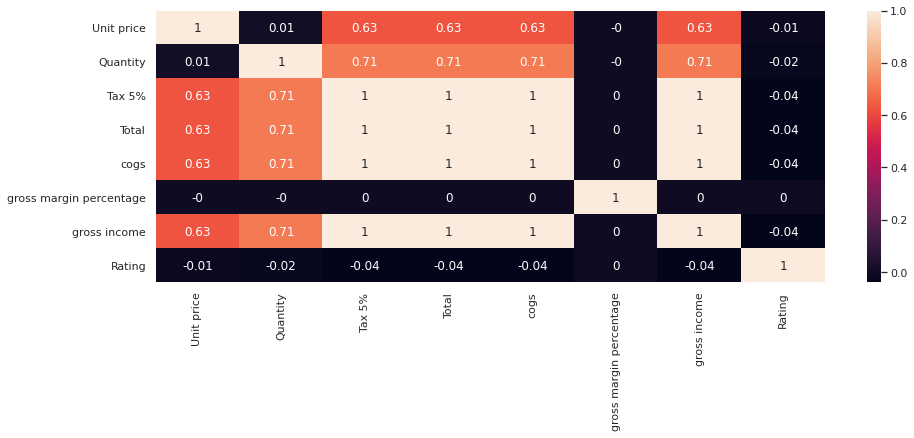

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

EXPLORATORY DATA ANALYSIS

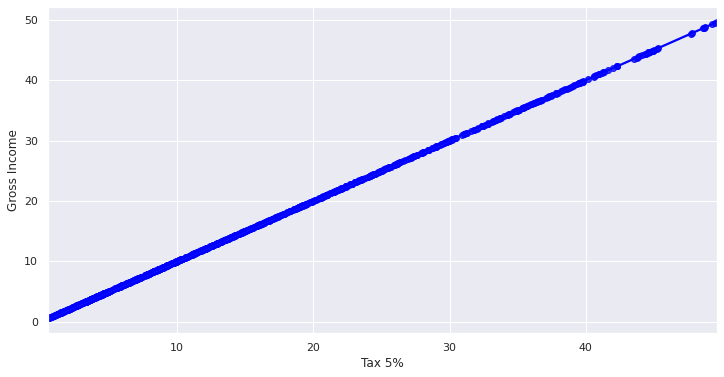

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x='Tax 5%',y='gross income',data=df,color='Blue')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

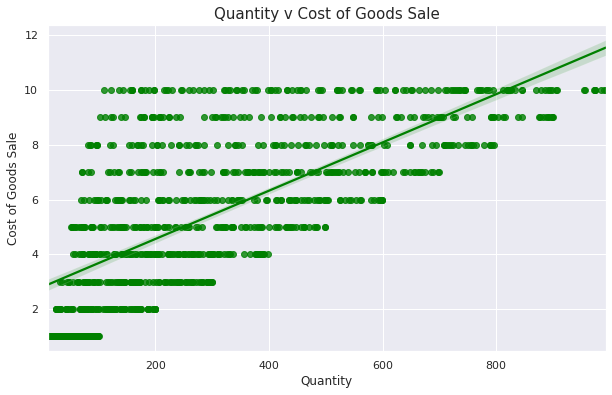

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='cogs',y='Quantity',data=df,color='green',scatter = True)
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

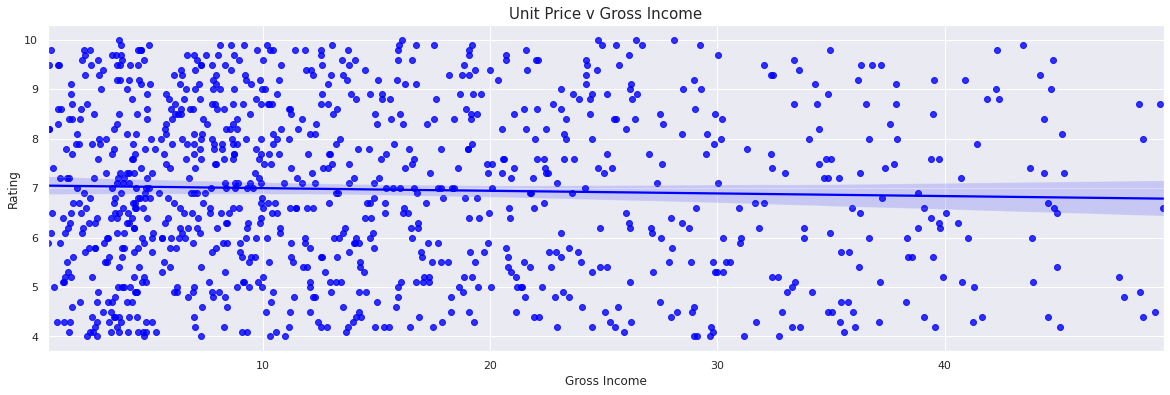

In [ ]:
plt.figure(figsize=(20,6))
sns.regplot(x='gross income',y='Rating',data=df,color='blue', x_jitter=.1)
plt.xlabel('Gross Income')
plt.ylabel('Rating')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


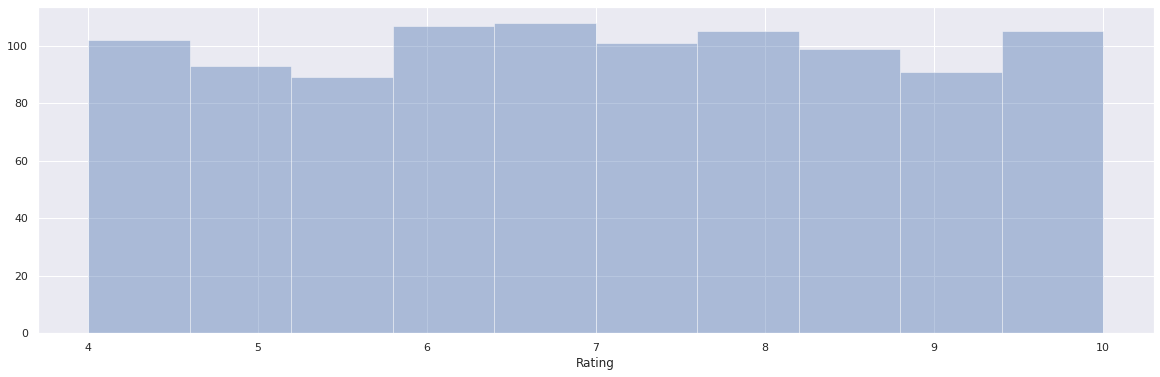

In [ ]:
# To see the distribution of different ratings
plt.figure(figsize=(20,6)) 
sns.distplot(df['Rating'],kde=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


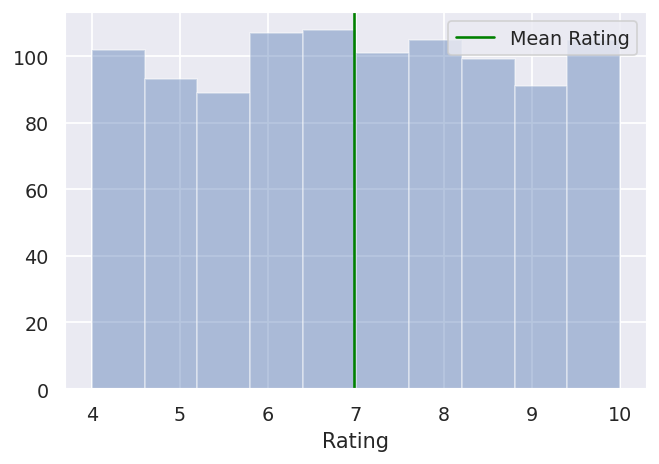

In [ ]:
# To find Mean Rating
plt.figure(dpi=125)
sns.distplot(df['Rating'],kde=False)
plt.axvline(x=np.mean(df['Rating']),c='green',label='Mean Rating')
plt.legend()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1775725250>,
      dtype=object)

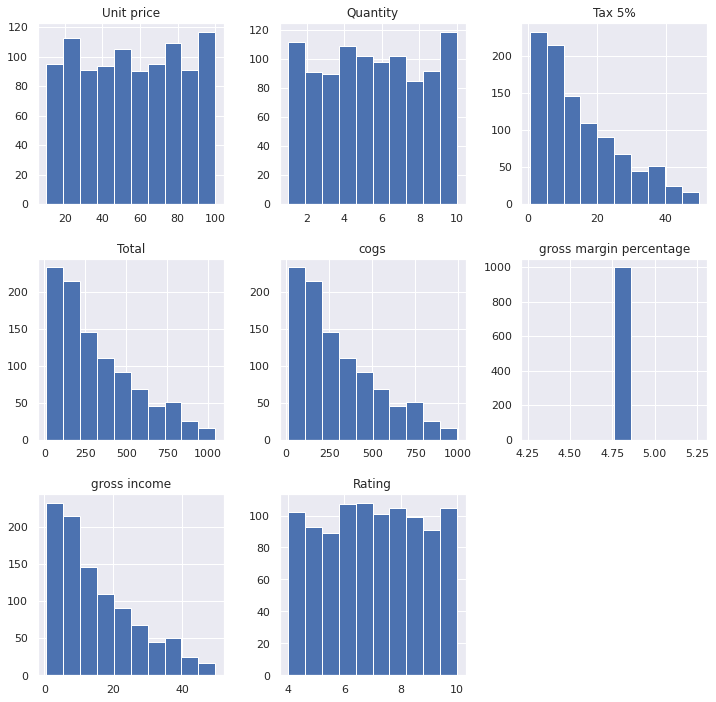

In [ ]:
df.hist(figsize=(12,12))

**Product Analysis**

Let's look at the various products' performance.

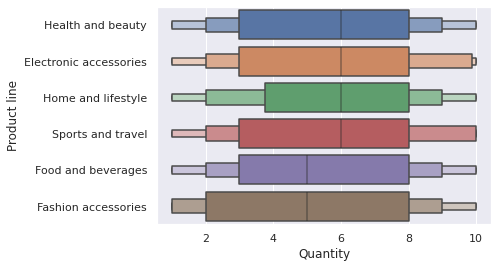

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data= df )

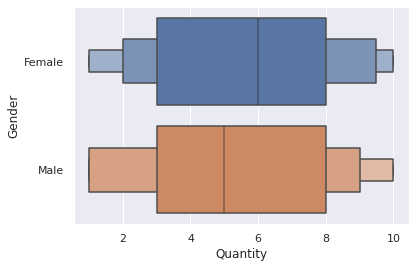

In [ ]:
sns.boxenplot(y = 'Gender', x = 'Quantity', data= df )

From the above visual, Health and Beauty,Electronic accessories, Homem and lifestyle, Sports and travel have a better average quantity sales that food and beverages as well as Fashion accessories

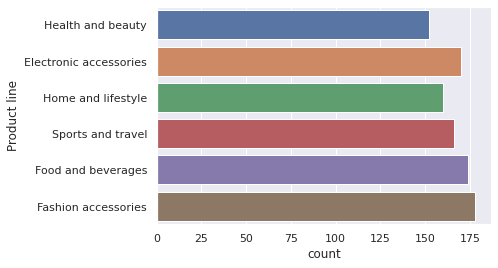

In [ ]:
sns.countplot(y = 'Product line', data=df )

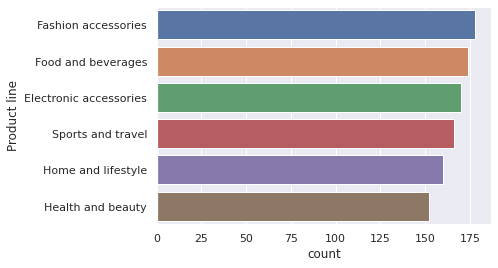

In [ ]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index)

From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest

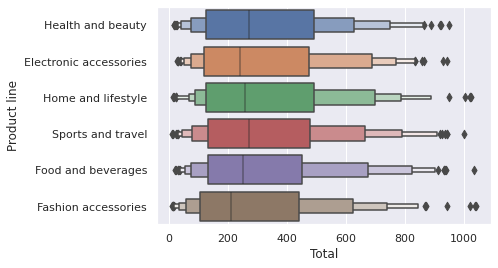

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Total', data=df)

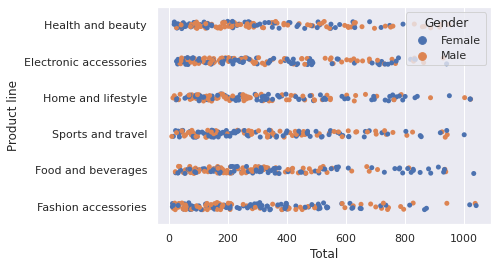

In [ ]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=df )

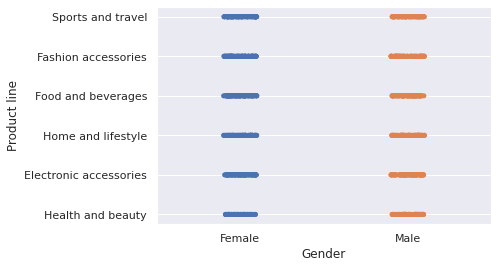

In [ ]:
sns.stripplot(y = 'Product line', x = 'Gender', data=df )

The visualization looks suspicious let's check numeric data.

In [ ]:
df.groupby(['Customer type']). agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


Above we can see the type of customer in all branch combined now let's check for different branch.

Text(0, 0.5, 'Customer Count')

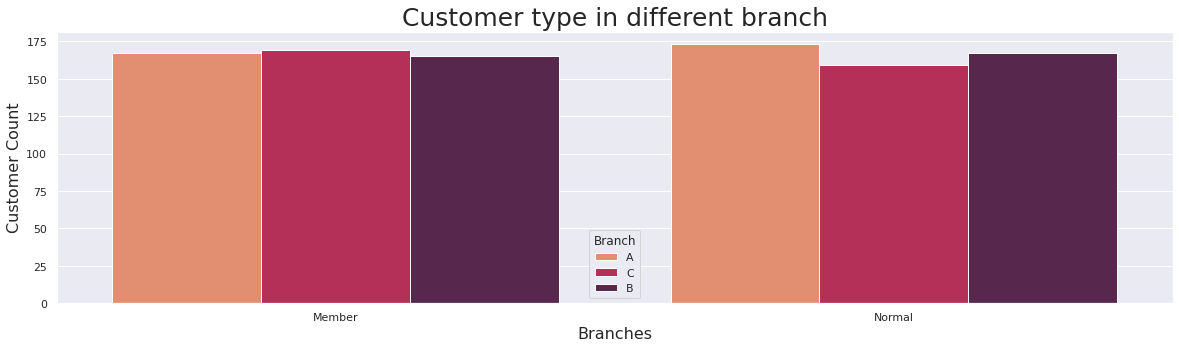

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x = "Customer type", hue = "Branch", data = df, palette= "rocket_r")
ax.set_title(label = "Customer type in different branch", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 16)

Checking the different payment methods used.

Text(0, 0.5, ' Customer Count')

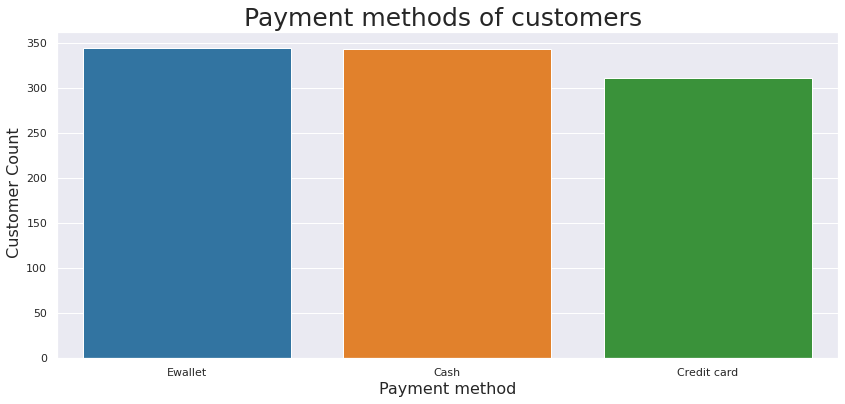

In [ ]:
plt.figure(figsize = (14,6))
ax = sns.countplot(x = "Payment", data = df, palette = "tab10")
ax.set_title(label = "Payment methods of customers ", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = " Customer Count", fontsize = 16)

Text(0, 0.5, 'People Count')

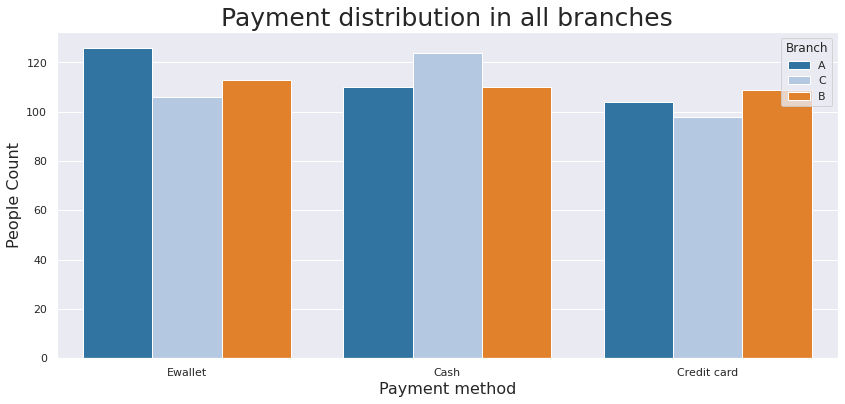

In [ ]:
##Payment method distribution in all branches
plt.figure(figsize = (14,6))
ax = sns.countplot(x="Payment", hue = "Branch", data = df, palette= "tab20")
ax.set_title(label = "Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "People Count", fontsize = 16)

Text(0, 0.5, 'Rating distribution')

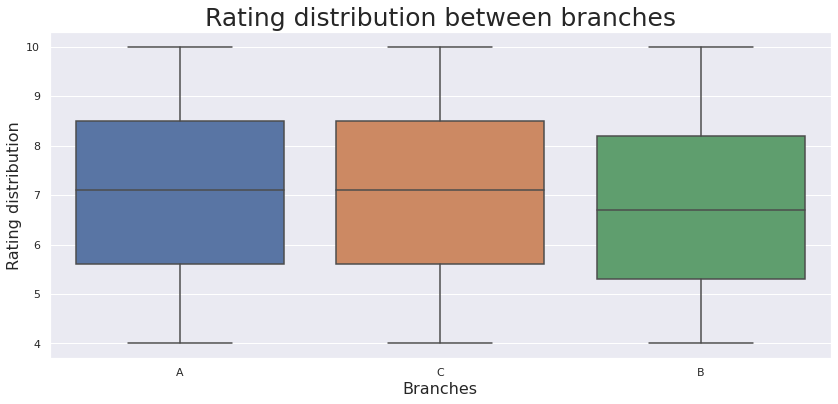

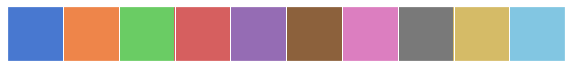

In [ ]:
##Now let's see the rating distribution in 3 branches
plt.figure(figsize=(14,6)) 
ax = sns.boxplot(x="Branch", y = "Rating" ,data =df)
sns.palplot(sns.color_palette("muted", 10))
ax.set_title("Rating distribution between branches", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Rating distribution", fontsize = 16)

In [1]:
#this is changes